In [2]:
import matplotlib.pyplot as plt
import numpy as np

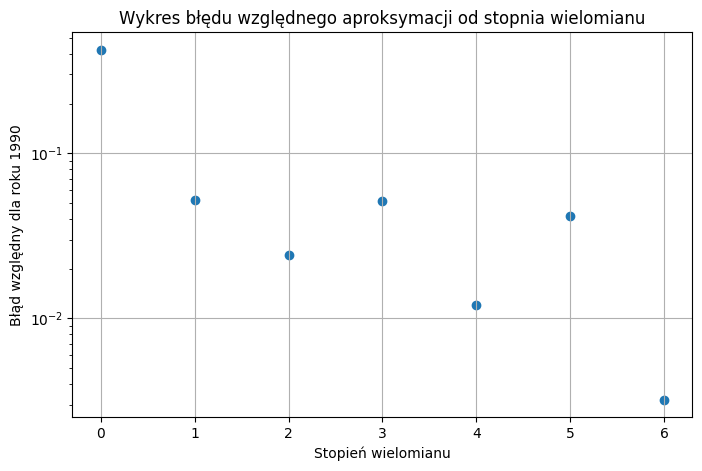

Najmniejszy błąd dla wielomianu stopnia m = 6 
Ekstrapolowana wartość: 249510782.0 
Błąd względny: 0.00322
Stopień wielomianu m	Aproksymowana wartość dla roku 1990	Błąd względny
	 0 			 143369177.0 			 0.42355
	 1 			 235808109.0 			 0.05187
	 2 			 254712945.0 			 0.02414
	 3 			 261439111.0 			 0.05118
	 4 			 251719359.0 			 0.0121
	 5 			 259115342.0 			 0.04184
	 6 			 249510782.0 			 0.00322
Stopień wielomianu m	Wartość kryterium Akaike'a
	 0 			 321.01098
	 1 			 289.05648
	 2 			 279.45337
	 3 			 284.8804
	 4 			 292.67239
	 5 			 319.82799
	 6 			 387.93123


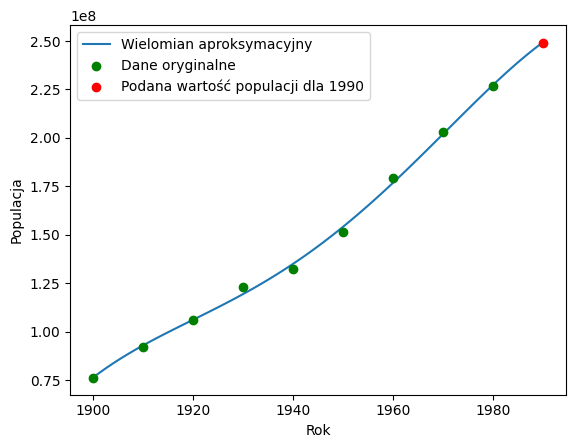

In [5]:
class Ex1:
    def __init__(self, samples: np.ndarray, population: np.ndarray, real_value: tuple, m_array: list):
        self.samples = samples
        self.population = population
        self.real_value = real_value    # krotka (prawdziwa wartość, rok do aproksymacji)
        self.m_array = m_array          # lista stopni wielomianu
        self.C = []                     # lista współczynników c dla kolejnych m

    def calc_coefficients(self):
        """
        Oblicza współczynniki wielomianu dla kolejnych stopni podanych w m_array.
        Korzystamy z równania: (A.T * A)c = A.T * Y
        """
        self.C = []  # zerujemy listę współczynników
        
        # Dla każdego stopnia m budujemy macierz Vandermonde'a i rozwiązujemy układ równań
        for m in self.m_array:
            A = np.vander(self.samples, m + 1, increasing=True)
            L = np.dot(A.T, A)
            P = np.dot(A.T, self.population)
            c = np.linalg.solve(L, P)
            self.C.append(c)

    def calc_errors(self) -> np.ndarray:
        """
        Oblicza błąd względny dla wielomianu o każdym stopniu w m_array.
        """
        errors = []
        extrapolate_year = self.real_value[1]
        true_value = self.real_value[0]
        
        # Dla każdego zestawu współczynników odwracamy kolejność, żeby dopasować
        # porządek współczynników do funkcji np.polyval (od najwyższej potęgi)
        for idx in self.m_array:
            coeff = self.C[idx][::-1]
            approx_val = np.polyval(coeff, extrapolate_year)
            relative_error = np.abs(approx_val - true_value) / true_value
            errors.append((approx_val, relative_error))
            
        return np.array(errors)

    def plot_errors(self, errors: np.ndarray, title: str):
        """
        Rysuje wykres błędu względnego dla kolejnych stopni wielomianu.
        """
        degrees = list(range(len(errors)))
        rel_errors = [e[1] for e in errors]
        
        plt.figure(figsize=(8, 5))
        plt.scatter(degrees, rel_errors)
        plt.yscale('log')
        plt.title(title)
        plt.xlabel("Stopień wielomianu")
        plt.ylabel("Błąd względny dla roku " + str(self.real_value[1]))
        plt.grid(True)
        plt.show()

    def find_smallest_error(self, errors: np.ndarray) -> tuple:
        """
        Znajduje stopień wielomianu dla którego względny błąd jest najmniejszy.
        """
        e = errors[:, 1]
        index = np.argmin(e)
        return (index, errors[index][0], errors[index][1])
    
    def print_errors(self, errors: np.ndarray):
        """
        Wypisuje wartości i ich błędy względne dla poszczególnych stopni wielomianu.
        """
        print("Stopień wielomianu m\tAproksymowana wartość dla roku " + str(self.real_value[1]) + "\tBłąd względny")
        for i in range(len(errors)):
            approx_val, rel_err = errors[i]
            print("\t", i, "\t\t\t", round(approx_val, 0), "\t\t\t", round(rel_err, 5))
    
    def AIC_value(self, m: int, n: int) -> float:
        """
        Oblicza wartość kryterium Akaike'a z poprawką (AIC_C) dla stopnia m.
        """
        coeff = self.C[m][::-1]
        k = m + 1
        # Obliczamy przybliżone wartości na podstawie wielomianu
        y_estimated = np.polyval(coeff, self.samples)
        RSS = np.sum((self.population - y_estimated) ** 2)
        
        AIC = 2 * k + n * np.log(RSS / n)
        correction = 2 * k * (k + 1) / (n - k - 1)
        return AIC + correction

    def print_AICs(self):
        """
        Wypisuje wartości kryterium Akaike'a dla poszczególnych stopni wielomianu.
        """
        print("Stopień wielomianu m\tWartość kryterium Akaike'a")
        n = len(self.samples)
        for m in self.m_array:
            aic = self.AIC_value(m, n)
            print("\t", m, "\t\t\t", round(aic, 5))
            
    def plot(self, m):
        annual_points = np.arange(start=1900, stop=1991, step=1)
        # Używamy współczynników dla wielomianu, który uzyskał najmniejszy błąd (dla przykładu C[2])
        population_approx = np.polyval(self.C[m][::-1], annual_points)
        plt.plot(annual_points, population_approx, label="Wielomian aproksymacyjny")
        plt.scatter(self.samples, self.population, color="green", zorder=2, label="Dane oryginalne")
        plt.scatter(real_value[1], real_value[0], color="red", zorder=2, label="Podana wartość populacji dla 1990")
        plt.xlabel("Rok")
        plt.ylabel("Populacja")
        plt.legend()
        plt.show()


# Dane do zadania
samples = np.array(list(range(1900, 1990, 10)), dtype = np.double) # używamy dtype = double, aby zminimalizować błąd numeryczny
population = np.array([
    76_212_168, 92_228_496, 106_021_537, 123_202_624, 132_164_569, 
    151_325_798, 179_323_175, 203_302_031, 226_542_199], dtype=np.double)
real_value = (248709873, 1990)
m_array = [i for i in range(7)]

approximator = Ex1(samples, population, real_value, m_array)

# Obliczamy współczynniki wielomianów dla kolejnych stopni
approximator.calc_coefficients()

# Obliczamy błędy
errors = approximator.calc_errors()

# Rysujemy wykresy błędów
approximator.plot_errors(errors, "Wykres błędu względnego aproksymacji od stopnia wielomianu")

# Wypisujemy najmniejszy błąd
min_error = approximator.find_smallest_error(errors)
print("Najmniejszy błąd dla wielomianu stopnia m =", min_error[0],
      "\nEkstrapolowana wartość:", round(min_error[1], 0),
      "\nBłąd względny:", round(min_error[2], 5))

# Wypisujemy wszystkie błędy
approximator.print_errors(errors)

# Wypisujemy kryterium Akaike'a (AIC) dla kolejnych stopni
approximator.print_AICs()

# Dla najlepszych współczynników aproksymacji rysujemy wykres wielomianu oraz węzłów 
approximator.plot(min_error[0])


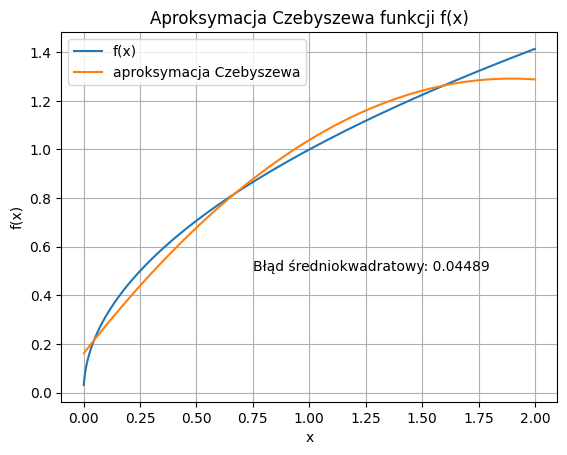

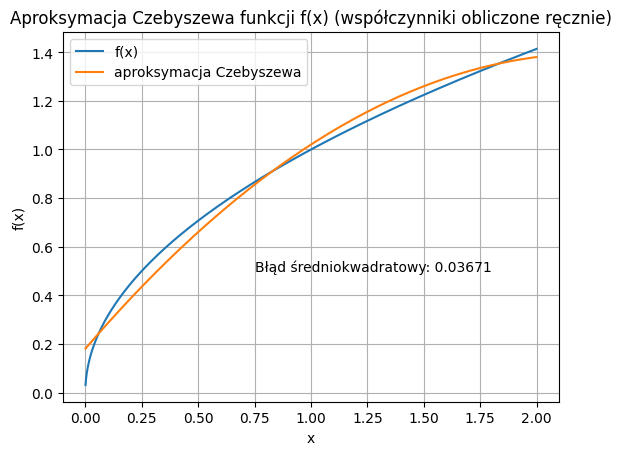

In [25]:
# Task 2
f = lambda x: np.sqrt(x)

def T(x, n):
    """
    Oblicza wartości wielomianu Czebyszewa dla argumentu x i stopnia n.
    Wykorzystywane jest jedynie n <= 2.
    """
    match n:
        case 0: return 1
        case 1: return x
        case 2: return 2*x**2-1
    return None

def change_domain(x):
    return x+1

def chebyshev_dot_product(i, j):
    """
    Oblicza iloczyn skalarny wielomianów Czebyszewa dla stopni i oraz j.
    """
    if i == j:
        if j == 0:
            return np.pi
        return np.pi/2
    return 0

def fun_dot_product(k):
    """
    Oblicza iloczyn skalarny funkcji f(x+1) z k-tym wielomianem Czebyszewa i wagą w = 1/sqrt(1-x^2)
    na przedziale [-1, 1].
    """
    def fun_product(x):
        return f(change_domain(x))*T(x, k)*1/np.sqrt(1-x**2)

    return np.trapz(fun_product(np.linspace(-1+2**(-10), 1-2**(-10), 1000)), np.linspace(-1+2**(-10), 1-2**(-10), 1000))

def evaluate_approximation(c, title):
    def chebyshev_approximation(x):
        """
        Oblicza wartość funkcji aproksymowanej przez wielomiany Czebyszewa.
        """
        res = 0
        for k in range(3):
            res += c[k]*T(x, k)
        return res

    # Rysujemy wykres funkcji f(x) oraz jej aproksymacji
    x_samples = np.linspace(-1+2**(-10), 1-2**(-10), 1000)
    plt.plot(change_domain(x_samples), f(change_domain(x_samples)), label="f(x)")
    plt.plot(change_domain(x_samples), chebyshev_approximation(x_samples), label="aproksymacja Czebyszewa")
    plt.annotate("Błąd średniokwadratowy: " + str(round(np.sqrt(np.mean((f(change_domain(x_samples)) - chebyshev_approximation(x_samples))**2)), 5)), xy=(0.75, 0.5))
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
c_computed = [fun_dot_product(k)/chebyshev_dot_product(k, k) for k in range(3)]
c_precomputed = [2*np.sqrt(2)/np.pi, 4*np.sqrt(2)/(3*np.pi), -4*np.sqrt(2)/(15*np.pi)]
evaluate_approximation(c_computed, "Aproksymacja Czebyszewa funkcji f(x)")
evaluate_approximation(c_precomputed, "Aproksymacja Czebyszewa funkcji f(x) (współczynniki obliczone ręcznie)")